In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm

In [2]:
def pickPath()-> Path:
    cwd = Path.cwd()
    parent = cwd.parent
    picklePath = parent.joinpath("data/pickle.pkl")
    return picklePath

def coefPath()-> Path:
    cwd = Path.cwd()
    parent = cwd.parent
    coefPath = parent.joinpath("data/coefs.csv")
    return coefPath

In [3]:
burglaries_month_by_lsoa = pd.read_pickle(pickPath())


In [4]:
coefs = np.empty((212,2))

In [5]:

for i, key in tqdm(enumerate(burglaries_month_by_lsoa.keys())):
    burglaries, unemployement = burglaries_month_by_lsoa[key]
    burglaries = burglaries.reset_index()
    burglaries = burglaries.rename(columns={0:"BPM"})
    burglaries = burglaries.set_index("date")
    burglaries = burglaries.join(unemployement, how="inner")
    burglaries.sort_index(inplace=True)
    burglaries["PCT_value"] = burglaries["value"].pct_change()
    burglaries = burglaries[burglaries.index<"2020"]
    burglaries = burglaries.fillna(0)
    burglaries.replace([np.inf, -np.inf], 0, inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(burglaries["PCT_value"].copy(), burglaries["BPM"].copy(), test_size=0.1)
    LM = LinearRegression()
    LM.fit(X_train.to_numpy().reshape(-1,1), y_train)
    coefs[i, 0] = LM.intercept_
    coefs[i, 1] = LM.coef_[0]
    # coefs[i, 2] = key

np.save(coefPath(), coefs)

0it [00:00, ?it/s]

ValueError: could not convert string to float: 'E01000248'

In [79]:
coefs

array([[ 1.92445393e+00,  9.28231237e-01],
       [ 2.07226107e+00, -3.54312354e-01],
       [ 1.66420616e+00, -2.54079254e-01],
       [ 2.24256277e+00, -5.03083451e-01],
       [ 1.84902970e+00,  4.21608408e-01],
       [ 1.65397583e+00, -3.04043930e-01],
       [ 2.94147550e+00, -2.10264972e+00],
       [ 1.40814046e+00,  6.63736180e-01],
       [ 1.80090572e+00, -2.33897385e-02],
       [ 1.69199947e+00, -1.85120876e-01],
       [ 1.55673485e+00, -5.74837441e-01],
       [ 1.56265605e+00, -6.62178726e-02],
       [ 2.50970021e+00,  1.87526098e-01],
       [ 2.18306219e+00,  3.83237100e-01],
       [ 2.28423872e+00, -5.84874175e-01],
       [ 1.91393998e+00, -1.11109859e+00],
       [ 1.63128214e+00, -4.88856808e-01],
       [ 1.90866600e+00,  1.32477594e-01],
       [ 2.01500492e+00,  2.59377292e-01],
       [ 1.68877799e+00, -4.83523849e-01],
       [ 1.82365356e+00, -4.79384694e-01],
       [ 2.13279211e+00, -2.87039722e-01],
       [ 2.21886792e+00,  3.27547170e-01],
       [ 1.

In [73]:
burglaries, unemployement = burglaries_month_by_lsoa[k]

burglaries = burglaries.reset_index()
burglaries = burglaries.rename(columns={0:"BPM"})
burglaries = burglaries.set_index("date")
burglaries = burglaries.join(unemployement, how="inner")
burglaries.sort_index(inplace=True)
burglaries["PCT_value"] = burglaries["value"].pct_change()
burglaries = burglaries[burglaries.index<"2020"]
burglaries = burglaries.fillna(0)
burglaries.replace([np.inf, -np.inf], 0, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(burglaries["PCT_value"].copy(), burglaries["BPM"].copy(), test_size=0.1)
LM = LinearRegression()
LM.fit(X_train.to_numpy().reshape(-1,1), y_train)
LM.coef_, LM.intercept_
# pred = LM.predict(X_test.to_numpy().reshape(-1,1))
# pred

(array([0.8276441]), 1.9303301622831561)

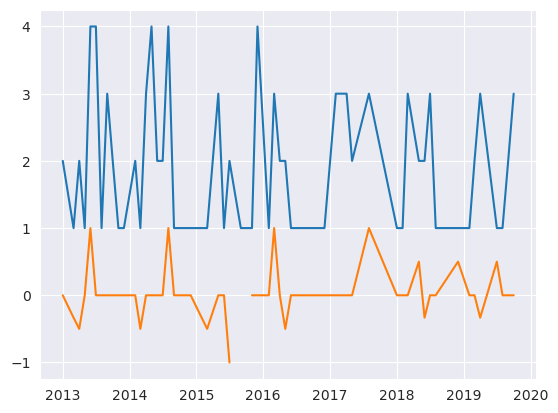

In [34]:
fig, ax = plt.subplots()
ax.plot(burglaries.index,burglaries["BPM"])
ax.plot(burglaries.index, burglaries["PCT_value"])

# Unemployement rate to burglary per month
granularity, time: month, geography: LSOA